In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm


In [2]:
DATA_FOLDER = '/Users/sunandashanbhag/Desktop/Coding/Kaggle/TimeSeries/hourly-energy-consumption/'

In [3]:
aep_hourly = pd.read_csv(DATA_FOLDER + 'AEP_hourly.csv')

In [4]:
aep_hourly.Datetime = pd.to_datetime(aep_hourly.Datetime, format = '%Y-%m-%d %H:%M:%S')

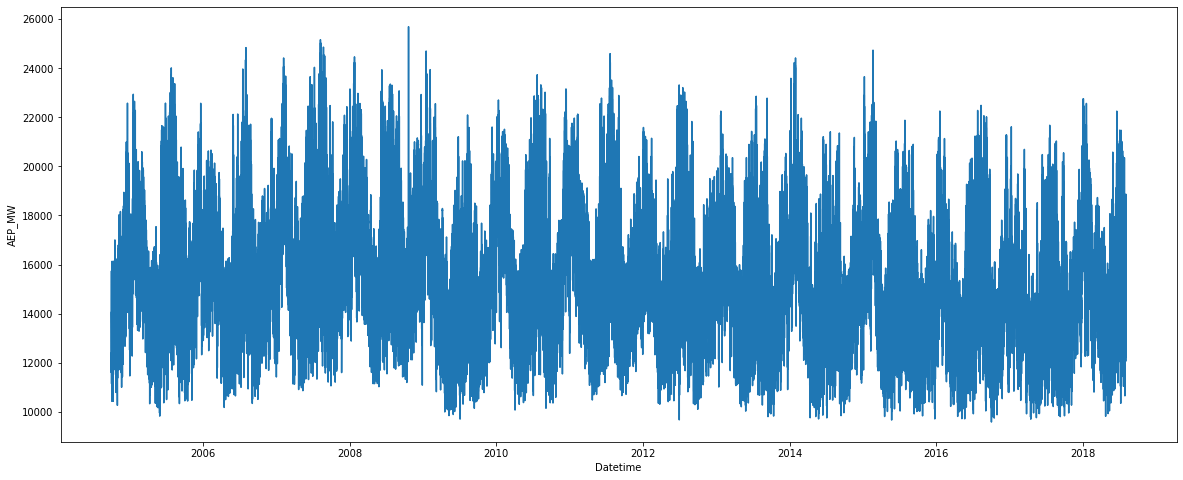

In [5]:
plt.figure(figsize = (20,8))
sns.lineplot(x = aep_hourly.Datetime,
            y = aep_hourly.AEP_MW)

In [6]:
aep_hourly.Datetime.min(), aep_hourly.Datetime.max()

(Timestamp('2004-10-01 01:00:00'), Timestamp('2018-08-03 00:00:00'))

In [7]:
aep_hourly = aep_hourly.set_index('Datetime')

In [8]:
y = pd.DataFrame(aep_hourly.AEP_MW.resample('MS').mean())

In [9]:
y

,AEP_MW
Datetime,
2004-10-01,13947.537736
2004-11-01,14830.440278
2004-12-01,16737.720430
2005-01-01,17117.088710
2005-02-01,16496.644345
...,...
2018-04-01,13639.244444
2018-05-01,14117.005376
2018-06-01,15305.250000


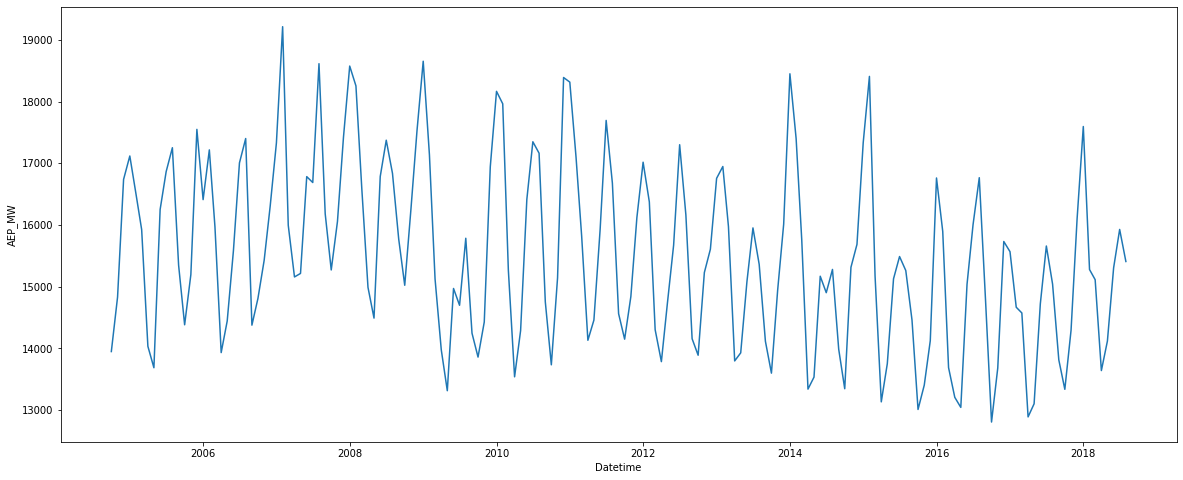

In [10]:
plt.figure(figsize = (20,8))
sns.lineplot(x = y.index, y=y.AEP_MW)

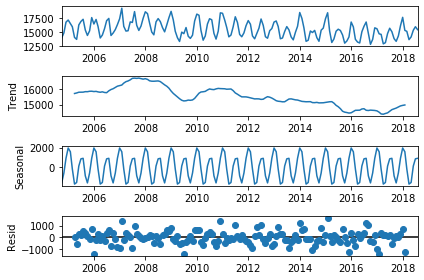

In [11]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

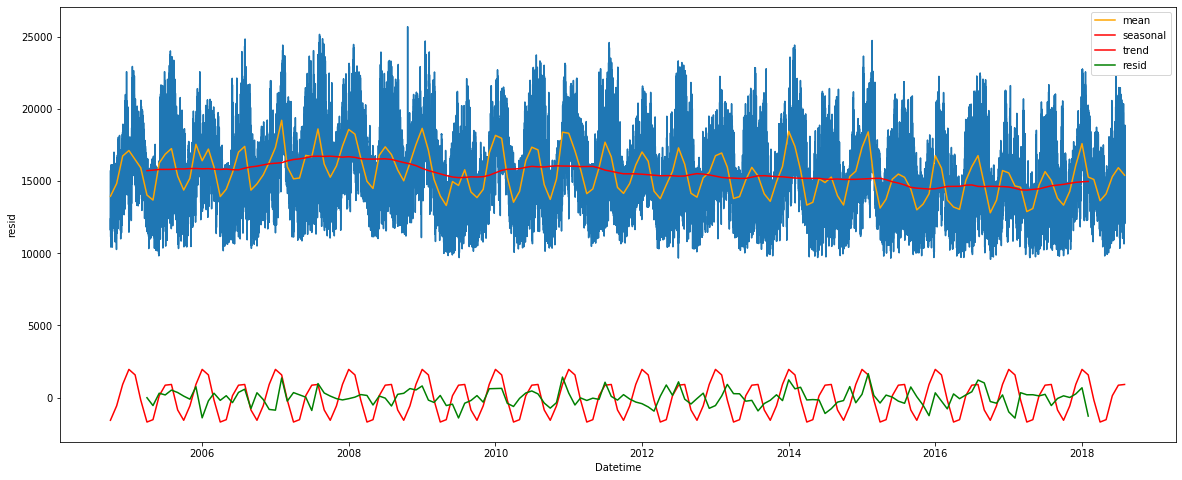

In [17]:
plt.figure(figsize = (20,8))
sns.lineplot(x = aep_hourly.index, y=aep_hourly.AEP_MW)
sns.lineplot(x = y.index, y=y.AEP_MW, color='orange', label='mean')
sns.lineplot(x = y.index, y = decomposition.seasonal, color='r', label='seasonal')
sns.lineplot(x = y.index, y = decomposition.trend, color='r', label='trend')
sns.lineplot(x = y.index, y = decomposition.resid, color='g', label='resid')


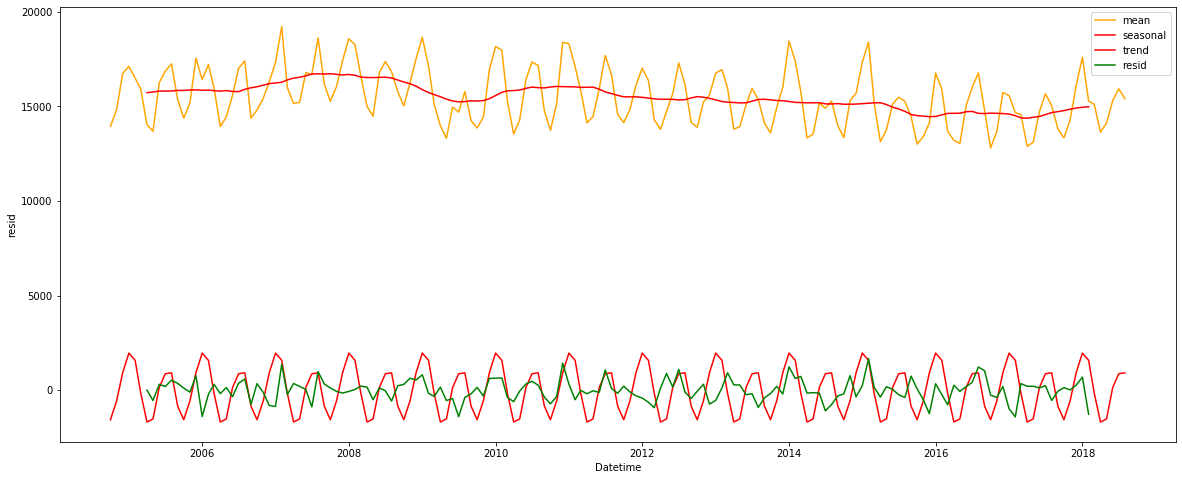

In [18]:
plt.figure(figsize = (20,8))
sns.lineplot(x = y.index, y=y.AEP_MW, color='orange', label='mean')
sns.lineplot(x = y.index, y = decomposition.seasonal, color='r', label='seasonal')
sns.lineplot(x = y.index, y = decomposition.trend, color='r', label='trend')
sns.lineplot(x = y.index, y = decomposition.resid, color='g', label='resid')
